* Mtplotlib is a multiplatform data visualization library built on NumPy arrays, and dsigned to work with the broader SciPy stack.

* One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large userbase, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

# General Matplotlib Tips
Before we dive into the details of creating visualizations with Matplotlib, there are a
few useful things you should know about using the package.

## Importing matplotlib
Just as we use the np shorthand for NumPy and the pd shorthand for Pandas, we will
use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Setting Styles
We will use the plt.style directive to choose appropriate aesthetic styles for our fig‐
ures. Here we will set the classic style, which ensures that the plots we create use the
classic Matplotlib style:

In [2]:
plt.style.use('classic')

### show() or No show()? How to Display Your Plots
A visualization you can’t see won’t be of much use, but just how you view your Mat‐
plotlib plots depends on the context. The best use of Matplotlib differs depending on
how you are using it; roughly, the three applicable contexts are using Matplotlib in a
script, in an IPython terminal, or in an IPython notebook.
#### Plotting from a script
If you are using Matplotlib from within a script, the function plt.show() is your
friend. plt.show() starts an event loop, looks for all currently active figure objects,
and opens one or more interactive windows that display your figure or figures

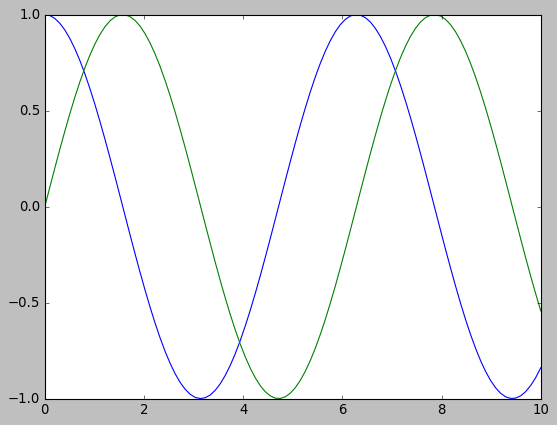

In [4]:
import numpy as np

x=np.linspace(0,10,100)
plt.plot(x, np.cos(x))
plt.plot(x,np.sin(x))


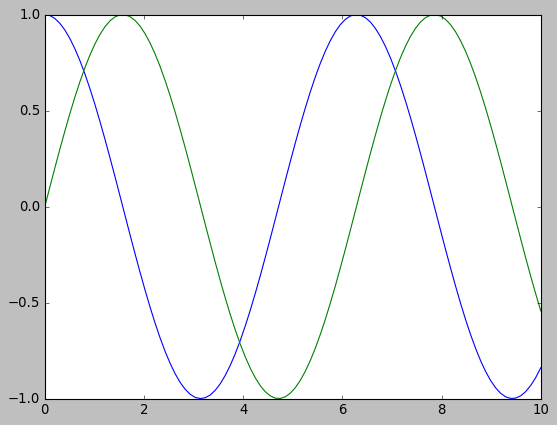

In [5]:
x=np.linspace(0,10,100)
plt.plot(x, np.cos(x))
plt.plot(x,np.sin(x))
plt.show()

You can then run this script from the command-line prompt, which will result in a
window opening with your figure displayed:
`$ python myplot.py`
The plt.show() command does a lot under the hood, as it must interact with your
system’s interactive graphical backend. The details of this operation can vary greatly
from system to system and even installation to installation, but Matplotlib does its
best to hide all these details from you.

• `%matplotlib notebook` will lead to interactive plots embedded within the notebook
• `%matplotlib inline` will lead to static images of your plot embedded in the notebook

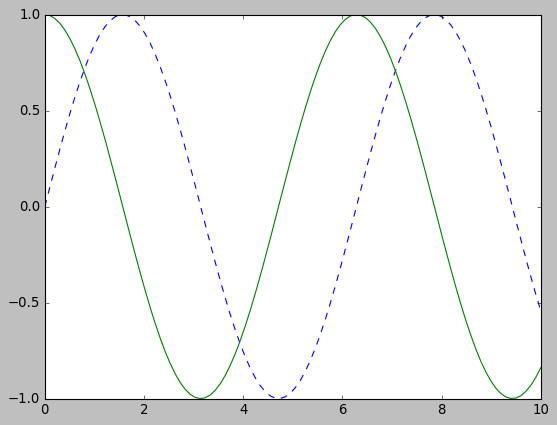

In [6]:
fig=plt.figure()
plt.plot(x, np.sin(x),'--')
plt.plot(x,np.cos(x),'-');

## Saving Figures to File
One nice feature of Matplotlib is the ability to save figures in a wide variety of for‐
mats. You can save a figure using the savefig() command. For example, to save the
previous figure as a PNG file, you can run this:

In [7]:
fig.savefig('cos_sinplots.png')

In [8]:
!ls -lh

total 168K
-rw-rw-r-- 1 qalmaqihir qalmaqihir 128K сен  5 09:09 01_Intro.ipynb
-rw-rw-r-- 1 qalmaqihir qalmaqihir  40K сен  5 09:10 cos_sinplots.png


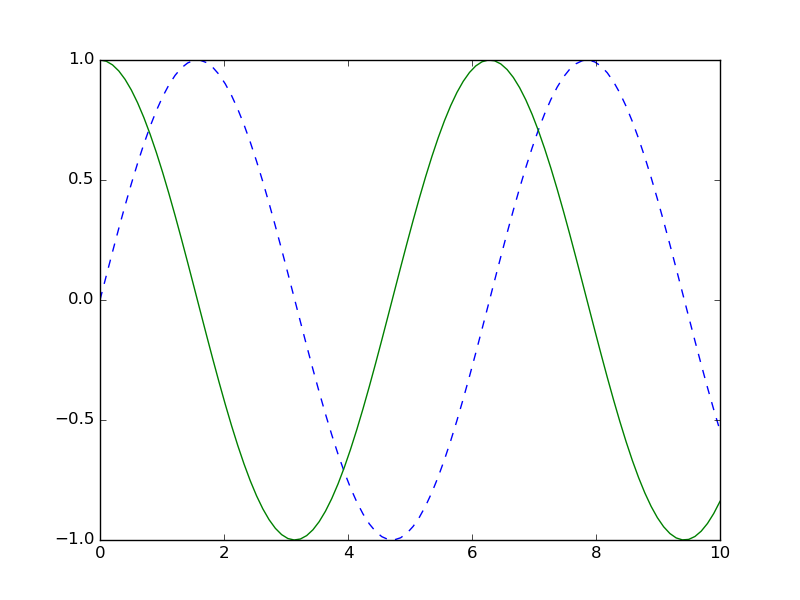

In [10]:
#lets display the image of our plots back
from IPython.display import Image
Image('cos_sinplots.png')

In savefig(), the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are
available. You can find the list of supported file types for your system by using the
following method of the figure canvas object:

In [11]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Two Interfaces for the Price of One
A potentially confusing feature of Matplotlib is its dual interfaces: a convenient
MATLAB-style state-based interface, and a more powerful object-oriented interface.
We’ll quickly highlight the differences between the two here. 

### MATLAB-style interface
Matplotlib was originally written as a Python alternative for MATLAB users, and
much of its syntax reflects that fact. The MATLAB-style tools are contained in the
pyplot (plt) interface.

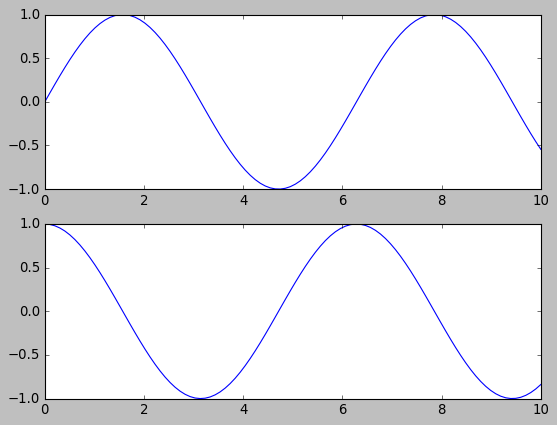

In [12]:
plt.figure() # create a plot figure

#create the first of two panels and set current axis
plt.subplot(2,1,1)
plt.plot(x,np.sin(x))

#create the 2nd of two panels and set current axis
plt.subplot(2,1,2)
plt.plot(x,np.cos(x))


In [13]:
plt.gcf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<AxesSubplot:>

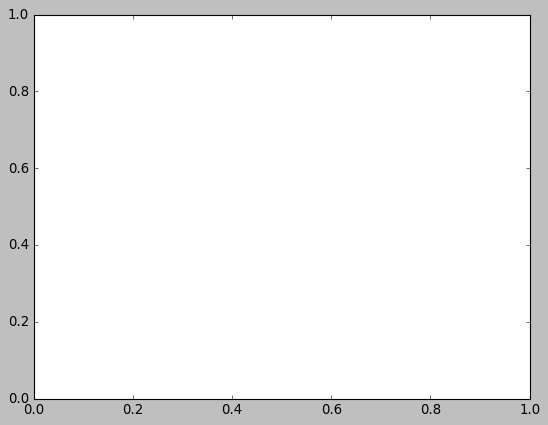

In [14]:
plt.gca()

It’s important to note that this interface is stateful: it keeps track of the “current” figure
and axes, which are where all plt commands are applied. You can get a reference to these using the plt.gcf() (get current figure) and plt.gca() (get current axes)
routines.


While this stateful interface is fast and convenient for simple plots, it is easy to run
into problems. For example, once the second panel is created, how can we go back
and add something to the first? This is possible within the MATLAB-style interface,
but a bit clunky. Fortunately, there is a better way.

### Object-oriented interface
The object-oriented interface is available for these more complicated situations, and
for when you want more control over your figure. Rather than depending on some
notion of an “active” figure or axes, in the object-oriented interface the plotting func‐
tions are methods of explicit Figure and Axes objects. To re-create the previous plot
using this style of plotting, you might do the following

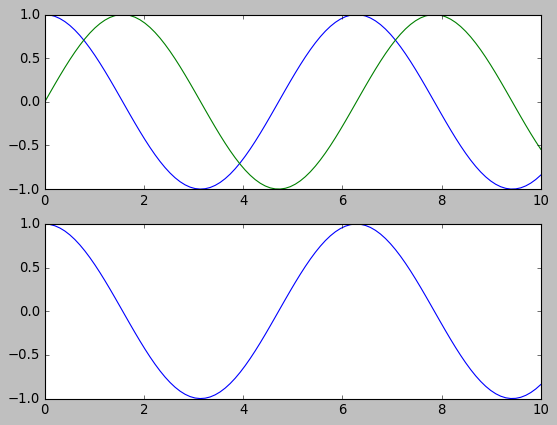

In [17]:
# first create a grid of plots
# ax will be an array of two Axes Objects
fig,ax=plt.subplots(2)

#call the plot() method on the appropriate object
ax[0].plot(x,np.cos(x))
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

For more simple plots, the choice of which style to use is largely a matter of prefer‐
ence, but the object-oriented approach can become a necessity as plots become more
complicated.